# Module 02 - Neural Network Classification with PyTorch

Classification is a probleam of predicting wheter something is one thing or another (tehre can be multiple options).

**Check:** https://playground.tensorflow.org/

### 1. Make Classification Data

In [1]:
# Libraries

# PyTorch
import torch
import torch.nn as nn

# SkLearn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# Data Manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Path
from pathlib import Path

# Seed and Device Agnostic Code
My_Seed = 42
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
# Create Data
n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=My_Seed, )
print(f'{X.shape=}, {y.shape=}')

# Print 5 Samples of each
print(f'\nFirst 5 samples of X:\n{X[:5,:]}'); print(f'\nFirst 5 samples of y:\n{y[:5]}')


X.shape=(1000, 2), y.shape=(1000,)

First 5 samples of X:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 samples of y:
[1 1 1 1 0]


,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1


Text(0.5, 1.0, 'Dataset')

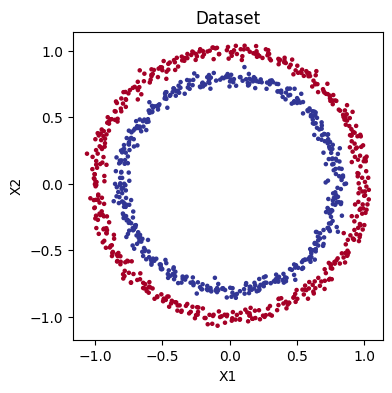

In [3]:
# Make a DataFrame of Circle Data
circles = pd.DataFrame({'X1': X[:,0], 'X2': X[:,1], 'label': y})
display(circles.head(6))

# Plot
plt.figure(figsize=(4,4))
plt.scatter(circles.X1, circles.X2, c=y, s=5, cmap=plt.cm.RdYlBu)
plt.xlabel('X1'); plt.ylabel('X2'); plt.title('Dataset')

#### 1.1. Check input & output shapes

In [4]:
X.shape, y.shape

((1000, 2), (1000,))

#### 1.2. Turn Data into tensors and Create train & test datasets

In [5]:
# Turn Data to Tensor
X = torch.Tensor(X)
y = torch.Tensor(y)

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=My_Seed)
len(X_train), len(X_test), len(y_train), len(y_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

### 2. Building a Model
Let's build a model to classify between our red and blue dots.

To do so, we will:
1. SetUp Device Agnostic Code (already done above).
2. Build a Model Structure
3. Create a Train/Test Loop

#### 2.1. Device Agnostic Code (DAC)

In [6]:
# 1. Setup Device Agnostic Code (DAC)
print('1. Setup Device Agnostic Code (DAC) --> Already done!')

1. Setup Device Agnostic Code (DAC) --> Already done!


#### 2.2. Build a Model Structure

In [ ]:
# 2. Build a Model Structure

class Circle_Model_V0(nn.Module):

    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)
        
    def forward(self, x):
        x = self.layer_2(self.layer_1(x))
        return x

In [8]:
# Create an Instance of our Model
torch.manual_seed(My_Seed)
model_0 = Circle_Model_V0().to(device)
model_0, model_0.state_dict()

(Circle_Model_V0(
   (layer_1): Linear(in_features=2, out_features=5, bias=True)
   (layer_2): Linear(in_features=5, out_features=1, bias=True)
 ),
 OrderedDict([('layer_1.weight',
               tensor([[ 0.5406,  0.5869],
                       [-0.1657,  0.6496],
                       [-0.1549,  0.1427],
                       [-0.3443,  0.4153],
                       [ 0.6233, -0.5188]], device='cuda:0')),
              ('layer_1.bias',
               tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
              ('layer_2.weight',
               tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='cuda:0')),
              ('layer_2.bias', tensor([-0.2060], device='cuda:0'))]))

In [11]:
# Let's replicate the model above with one Sequential Layer
torch.manual_seed(My_Seed)
seq_model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

seq_model_0, seq_model_0.state_dict()

(Sequential(
   (0): Linear(in_features=2, out_features=5, bias=True)
   (1): Linear(in_features=5, out_features=1, bias=True)
 ),
 OrderedDict([('0.weight',
               tensor([[ 0.5406,  0.5869],
                       [-0.1657,  0.6496],
                       [-0.1549,  0.1427],
                       [-0.3443,  0.4153],
                       [ 0.6233, -0.5188]], device='cuda:0')),
              ('0.bias',
               tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
              ('1.weight',
               tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='cuda:0')),
              ('1.bias', tensor([-0.2060], device='cuda:0'))]))

In [38]:
# Predictions before Training
model_0.eval()
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f'Lenght of Preds: {len(untrained_preds)}')

print(f'First 10 Preds:  {untrained_preds[:10]}')
print(f'First 10 Labels: {y_test[:10]}')
print("\n---> Our predictions DON'T look anything as our labels. They must have the same nature, we'll see this below")

Lenght of Preds: 200
First 10 Preds:  tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667],
        [-0.1484],
        [-0.0826],
        [-0.0946],
        [-0.1918],
        [-0.0944]], device='cuda:0')
First 10 Labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])

---> Our predictions DON'T look anything as our labels. They must have the same nature, we'll see this below


#### 2.3. Create a Train/Test Loop

Also, we'll need a criterion and an optimizer. Which one to choose? --> Again, this is problem specific.

1. Loss Function (Criterion):
* For **Regression** we may want to use ***MAE*** (L1) or ***MSE*** (Mean Absolute Error or Mean Squared Error)
* For **Classification** we me want to use ***Binary Cross Entropy*** or ***Categorical Cross Entropy*** (cross entropy).

2. Optimizer: SDG or ADAM

In this case, we'll use:
* **criterion** = `torch.nn.BCEWithLogitsLoss()`
* **optimizer** = `torch.optim.SGD()`

In [42]:
# 2.3. Create a Train/Test Loop

criterion = nn.BCEWithLogitsLoss()